<a href="https://colab.research.google.com/github/jeromeslash83/Data-Science/blob/main/Practice_Hexchart_NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA Shot Hexchart practice.

Here I'll be practicing how to do a hexchart for NBA Shots using Jokic for the 2022-23 NBA Season. Plus saving the codes as my boilerplate for NBA Analytics

In [53]:
!pip install nba_api

In [2]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog, shotchartdetail
from nba_api.stats.endpoints import playergamelog, leaguedashplayerstats
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
name="Nikola Jokic"
all_players = players.get_players()
jokic = [player for player in all_players if player['full_name'] == name][0]['id']

shot_chart = shotchartdetail.ShotChartDetail(team_id=0, player_id=jokic, season_nullable='2022-23', context_measure_simple='FGA')
shot_data=shot_chart.get_data_frames()[0]
shot_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022200012,57,203999,Nikola Jokic,1610612743,Denver Nuggets,1,7,30,...,Center(C),Less Than 8 ft.,1,-7,13,1,1,20221019,UTA,DEN
1,Shot Chart Detail,0022200012,67,203999,Nikola Jokic,1610612743,Denver Nuggets,1,6,31,...,Center(C),Less Than 8 ft.,6,28,64,1,1,20221019,UTA,DEN
2,Shot Chart Detail,0022200012,130,203999,Nikola Jokic,1610612743,Denver Nuggets,1,2,36,...,Center(C),Less Than 8 ft.,5,47,26,1,1,20221019,UTA,DEN
3,Shot Chart Detail,0022200012,241,203999,Nikola Jokic,1610612743,Denver Nuggets,2,7,41,...,Center(C),Less Than 8 ft.,1,-16,-6,1,1,20221019,UTA,DEN
4,Shot Chart Detail,0022200012,272,203999,Nikola Jokic,1610612743,Denver Nuggets,2,5,37,...,Center(C),Less Than 8 ft.,2,11,17,1,1,20221019,UTA,DEN


In [52]:
shot_data.shape

(1022, 24)

In [56]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # Fill in the court
    court_color = '#ffdfba'  # A light brown color that can represent hardwood
    ax.add_patch(Rectangle((-250, -47.5), 500, 470, facecolor=court_color, zorder=0))

    # The hoop
    hoop = Circle((0,-15.5), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -25.5), 60, 0.4, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    # Free Throw Top Arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')


    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    # List of elements to draw on the court
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    for element in court_elements:
        ax.add_patch(element)

    # Set the limits for the court in the x and y axis
    ax.set_xlim(-250, 250)
    ax.set_ylim(422.5, -35.5)

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Set an aspect ratio that ensures the court is drawn proportionally
    ax.set_aspect('equal')

    return ax

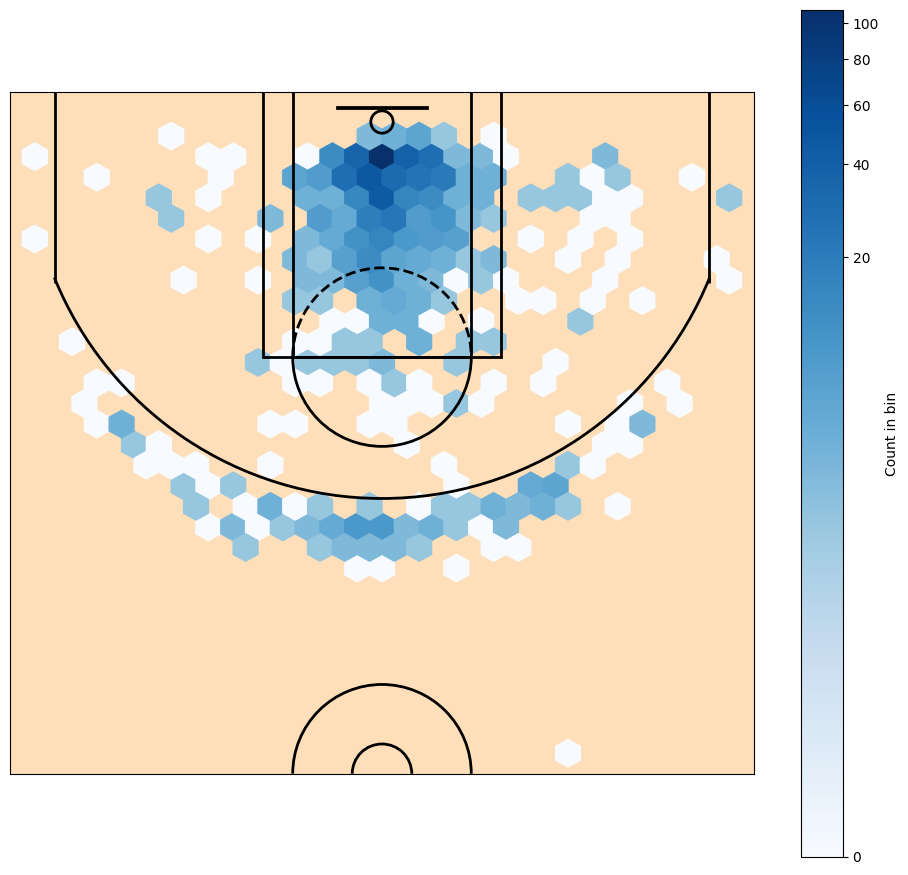

In [57]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 11))
draw_court(ax)

# Create the hexbin plot
hexbin = ax.hexbin(shot_data['LOC_X'], shot_data['LOC_Y'], gridsize=30, extent=(-250, 250, -47.5, 422.5), cmap='Blues', mincnt=1,
                   norm=colors.PowerNorm(gamma=0.2), zorder=0)

# Add a color bar
cbar = plt.colorbar(hexbin, ax=ax)
cbar.set_label('Count in bin')

plt.show()